<a href="https://colab.research.google.com/github/Onyinnye/Credit-Card-Fraud-Detection-with-unbalanced-dataset/blob/main/Credit_card_fraud_detection_with_unbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Display all columns
pd.set_option('display.max_columns', None)


In [9]:
# loading the dataset to a pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [10]:
# Viewing the first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
#Viewing the last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [12]:
# Data Information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
# Checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [18]:
# Checking the distribution of legit transaction and fraudulent transaction
transaction_dist = credit_card_data['Class'].value_counts()
transaction_dist

0    284315
1       492
Name: Class, dtype: int64

<Axes: >

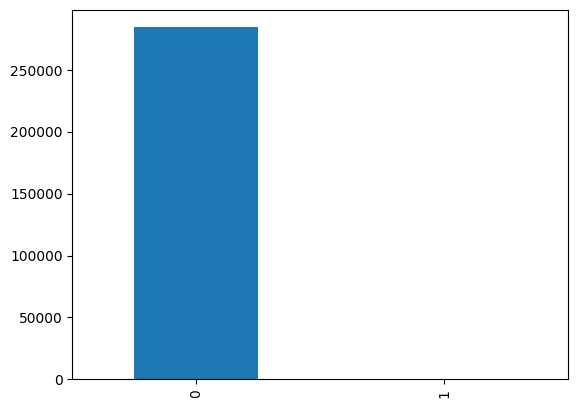

In [22]:
# Visualizing this distrbution:
transaction_dist.plot(kind = 'bar')

From the distribution above, we see that the data is very inbalanced.
0 represents normal transaction while 1 represents fraudulent transaction. The normal transaction is about 99%.

In [25]:
# Seperating the data for analysis
legit = credit_card_data[credit_card_data['Class']== 0]
fraudulent = credit_card_data[credit_card_data['Class']== 1]

In [26]:
print(legit.shape)
print(fraudulent.shape)

(284315, 31)
(492, 31)


In [27]:
# Getting statistical measures of thr dataset
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [28]:
fraudulent['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [29]:
# Comparing the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and fraudulent transactions

Number of fraudulent transaction = 492

In [30]:
# Sampling 492 random samples of the normal transactions to have the same number of data for both normal and fraudulent transactions
legit_sample = legit.sample(n = 492)

Concatenating two DataFrames

In [31]:
new_dataset = pd.concat([legit_sample, fraudulent], axis=0)

In [32]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
125311,77613.0,0.910072,-0.323932,0.430441,1.175283,-0.570314,-0.196697,-0.077736,0.092514,0.074096,0.169513,0.800704,0.118263,-1.208498,0.685388,0.580054,0.736972,-0.843328,0.693667,-0.094128,0.100704,0.025107,-0.340080,-0.131994,-0.041789,0.329212,-0.487333,-0.006188,0.040768,150.00,0
276785,167294.0,1.970243,1.288691,-2.053000,3.880950,1.690759,0.064416,0.505348,-0.128903,-1.287151,0.256243,-0.755671,-0.105624,1.545061,-2.873346,-0.678184,1.836461,1.030071,0.478097,-1.458544,-0.066606,-0.462859,-1.255682,0.238631,-0.245705,-0.083343,-0.336304,0.001166,0.020508,4.00,0
148980,90395.0,-0.323330,0.842451,3.580663,4.764622,-0.130618,2.935544,-0.782019,0.500292,1.125381,0.686667,-1.722589,-3.470750,1.317690,-0.001668,-1.619124,-0.276364,1.098446,1.029367,1.650499,0.274848,-0.150196,0.404414,-0.438809,0.055697,0.150147,0.598710,-0.003512,-0.120662,15.13,0
169353,119654.0,2.055609,-0.606027,-0.686339,0.233520,-0.417252,0.246750,-0.896154,0.229968,1.623470,0.060372,-1.943273,-1.026913,-1.846451,0.108986,0.721828,0.589044,-0.583873,0.429028,-0.044731,-0.301598,0.084814,0.359635,0.154179,0.023137,-0.252088,0.589327,-0.033885,-0.053590,0.00,0
70087,53703.0,-0.923593,1.364420,0.329237,-0.316653,0.266578,-0.080876,0.194832,0.604171,-0.489748,-0.247306,0.252368,0.187390,-0.088608,0.023208,0.303622,1.044703,-0.485382,0.808706,0.605595,0.160698,-0.281186,-0.863386,-0.111260,-0.902302,0.024990,0.134812,0.228348,0.060534,12.99,0


In [33]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [35]:
# Checking the distribution of our new dataset
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [36]:
#Grouping the transactions of the new dataset to make sure the structure of our dataset hasn't changed
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,98154.237805,0.072291,-0.004517,0.038755,0.068220,0.004474,0.010288,-0.065078,-0.012991,0.031819,0.107520,-0.059114,-0.023072,-0.045870,0.007148,-0.018226,0.095066,-0.041244,-0.002083,0.005980,-0.028777,0.044644,0.014871,0.045005,0.019381,-0.012430,0.004117,0.017954,-0.008914,76.724533
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


We can see tht structure of our dataset has not changed so we can proceed to build the machine learning model

Splitting the dataset into features or targets

In [37]:
from tables.file import ne
X =new_dataset.drop('Class', axis=1)
y = new_dataset['Class']

In [38]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
125311   77613.0  0.910072 -0.323932  0.430441  1.175283 -0.570314 -0.196697   
276785  167294.0  1.970243  1.288691 -2.053000  3.880950  1.690759  0.064416   
148980   90395.0 -0.323330  0.842451  3.580663  4.764622 -0.130618  2.935544   
169353  119654.0  2.055609 -0.606027 -0.686339  0.233520 -0.417252  0.246750   
70087    53703.0 -0.923593  1.364420  0.329237 -0.316653  0.266578 -0.080876   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9   

In [39]:
print(y)

125311    0
276785    0
148980    0
169353    0
70087     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into training data and testing data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model training

Logistic Regression

In [42]:
model = LogisticRegression()

In [44]:
#training the logistic regression model with training data
model.fit(X_train, y_train)

LogisticRegression()

Model Evaluation
Accuracy Score

In [45]:
#Accuracy on training data
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, y_train)

In [46]:
print('Accuracy on training data :', training_data_accuracy)

Accuracy on training data : 0.9479034307496823


In [47]:
#Accuracy on test data
X_test_pred = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_pred, y_test)

In [48]:
print('Accuracy on test data:', testing_data_accuracy)

Accuracy on test data: 0.9187817258883249
